In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
X, y = make_classification(
    n_samples=4000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=5,
    n_clusters_per_class=1,
    random_state=42
)


enc = OneHotEncoder(sparse_output=False)
y_oh = enc.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_oh, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3200, 20)
Test shape: (800, 20)


In [89]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)


In [90]:
class NeuralNetwork:
    def __init__(self, input_size, h1, h2, h3, output_size, lr=0.001):
        self.lr = lr

        self.W1 = np.random.randn(input_size, h1) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, h1))

        self.W2 = np.random.randn(h1, h2) * np.sqrt(2 / h1)
        self.b2 = np.zeros((1, h2))

        self.W3 = np.random.randn(h2, h3) * np.sqrt(2 / h2)
        self.b3 = np.zeros((1, h3))

        self.W4 = np.random.randn(h3, output_size) * np.sqrt(2 / h3)
        self.b4 = np.zeros((1, output_size))

    def forward(self, X):
     self.Z1 = np.dot(X, self.W1) + self.b1
     self.A1 = relu(self.Z1)

     self.Z2 = np.dot(self.A1, self.W2) + self.b2
     self.A2 = relu(self.Z2)

     self.Z3 = np.dot(self.A2, self.W3) + self.b3
     self.A3 = relu(self.Z3)

     self.Z4 = np.dot(self.A3, self.W4) + self.b4
     self.A4 = softmax(self.Z4)

     return self.A4


    def backward(self, X, y_true):
     m = X.shape[0]

     # Output
     dZ4 = self.A4 - y_true
     dW4 = np.dot(self.A3.T, dZ4) / m
     db4 = np.sum(dZ4, axis=0, keepdims=True) / m

     # Layer 3
     dA3 = np.dot(dZ4, self.W4.T)
     dZ3 = dA3 * relu_derivative(self.Z3)
     dW3 = np.dot(self.A2.T, dZ3) / m
     db3 = np.sum(dZ3, axis=0, keepdims=True) / m

     # Layer 2
     dA2 = np.dot(dZ3, self.W3.T)
     dZ2 = dA2 * relu_derivative(self.Z2)
     dW2 = np.dot(self.A1.T, dZ2) / m
     db2 = np.sum(dZ2, axis=0, keepdims=True) / m

     # Layer 1
     dA1 = np.dot(dZ2, self.W2.T)
     dZ1 = dA1 * relu_derivative(self.Z1)
     dW1 = np.dot(X.T, dZ1) / m
     db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Updates
     self.W1 -= self.lr * dW1
     self.b1 -= self.lr * db1
     self.W2 -= self.lr * dW2
     self.b2 -= self.lr * db2
     self.W3 -= self.lr * dW3
     self.b3 -= self.lr * db3
     self.W4 -= self.lr * dW4
     self.b4 -= self.lr * db4


    def compute_loss(self, y_true, y_pred):
     m = y_true.shape[0]
     return -np.sum(y_true * np.log(y_pred + 1e-8)) / m



In [91]:
input_dim = X_train.shape[1]
np.random.seed(42)

nn = NeuralNetwork(
    input_size=input_dim,
    h1=64,
    h2=64,
    h3=32,
    output_size=5,
    lr=0.001
)


In [92]:
epochs = 1000
batch_size = 64

loss_history = []
acc_history = []

for epoch in range(epochs):

    # Shuffle the data
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]

    # Mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        xb = X_train_shuffled[i : i + batch_size]
        yb = y_train_shuffled[i : i + batch_size]

        outputs = nn.forward(xb)
        nn.backward(xb, yb)

    # Evaluate on full training set
    y_pred_train = nn.forward(X_train)
    loss = nn.compute_loss(y_train, y_pred_train)
    acc = accuracy_score(
        np.argmax(y_train, axis=1),
        np.argmax(y_pred_train, axis=1)
    )

    loss_history.append(loss)
    acc_history.append(acc)

    if epoch % 50 == 0:
      print(f"Epoch {epoch} | Loss: {loss:.4f} | Train Acc: {acc:.4f}")


Epoch 0 | Loss: 2.4607 | Train Acc: 0.3178
Epoch 50 | Loss: 0.5419 | Train Acc: 0.8084
Epoch 100 | Loss: 0.3840 | Train Acc: 0.8681
Epoch 150 | Loss: 0.3032 | Train Acc: 0.9031
Epoch 200 | Loss: 0.2493 | Train Acc: 0.9250
Epoch 250 | Loss: 0.2115 | Train Acc: 0.9403
Epoch 300 | Loss: 0.1834 | Train Acc: 0.9519
Epoch 350 | Loss: 0.1619 | Train Acc: 0.9578
Epoch 400 | Loss: 0.1441 | Train Acc: 0.9641
Epoch 450 | Loss: 0.1293 | Train Acc: 0.9688
Epoch 500 | Loss: 0.1165 | Train Acc: 0.9728
Epoch 550 | Loss: 0.1050 | Train Acc: 0.9759
Epoch 600 | Loss: 0.0951 | Train Acc: 0.9797
Epoch 650 | Loss: 0.0862 | Train Acc: 0.9834
Epoch 700 | Loss: 0.0783 | Train Acc: 0.9850
Epoch 750 | Loss: 0.0715 | Train Acc: 0.9853
Epoch 800 | Loss: 0.0653 | Train Acc: 0.9878
Epoch 850 | Loss: 0.0596 | Train Acc: 0.9884
Epoch 900 | Loss: 0.0546 | Train Acc: 0.9909
Epoch 950 | Loss: 0.0502 | Train Acc: 0.9916


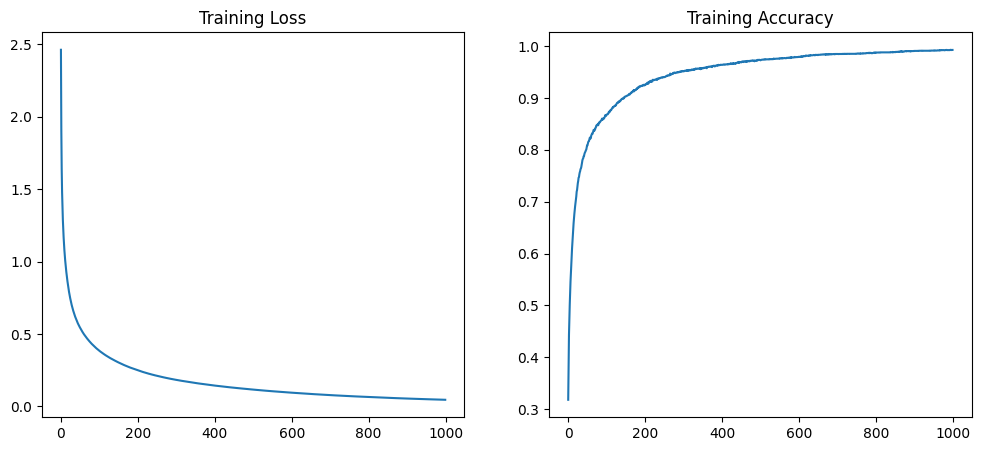

In [93]:
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss")

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(acc_history)
plt.title("Training Accuracy")

plt.show()


In [94]:
y_pred_test = nn.forward(X_test)

y_pred_labels = np.argmax(y_pred_test, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("Test Accuracy:", accuracy_score(y_true_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels))


Test Accuracy: 0.9025
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       147
           1       0.90      0.88      0.89       146
           2       0.88      0.92      0.90       149
           3       0.93      0.91      0.92       181
           4       0.89      0.89      0.89       177

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



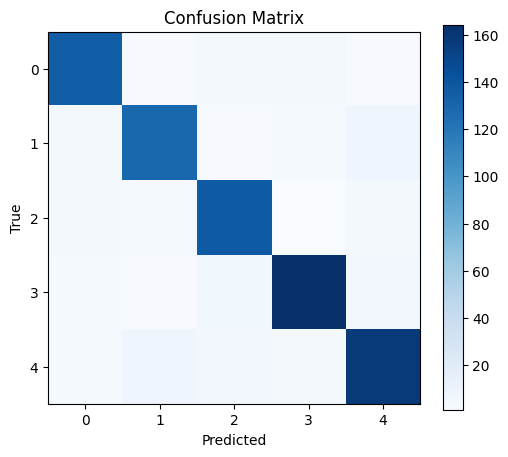

In [95]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
